# Importing necessary packages and the data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# imports the csv into the local notebook
df = pd.read_csv('real_estate_db.csv', encoding='latin-1')

# Cleaning the data

In [3]:
# drops duplicate rows and a nan column
df.drop_duplicates(subset=None, inplace=True)
df.drop('BLOCKID', axis=1, inplace=True)

# turns null characters into nan and drops all columns including nan
df = df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(axis=0, inplace=True)

# samples 0.01 of the data
df_sampled = df.sample(frac=0.01)
df_sampled.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
14877,248587,140,227,21,Kentucky,KY,Bowling Green,Bowling Green City,City,tract,...,29.52531,22.08333,17.73029,665.66398,1281.0,0.32096,0.24603,0.02778,0.01488,0.05456
30307,277896,140,91,42,Pennsylvania,PA,Ardmore,Narberth,Borough,tract,...,41.31562,40.58333,22.34557,744.60215,3352.0,0.61750,0.68414,0.04698,0.01342,0.07718
11167,241478,140,141,19,Iowa,IA,Hartley,Hartley City,City,tract,...,42.69460,47.33333,25.60227,304.75374,1449.0,0.83378,0.66994,0.03635,0.00786,0.09725
13030,245134,140,197,17,Illinois,IL,Custer Park,Lakewood Shores,Village,tract,...,46.49105,49.41667,20.75194,151.77341,608.0,0.84453,0.63958,0.03887,0.02120,0.14488
6522,232808,140,59,8,Colorado,CO,Evergreen,Evergreen,City,tract,...,45.31463,50.41667,22.65260,460.44035,1993.0,0.71855,0.63374,0.01658,0.00000,0.18241


# Function to create a boolean from Graduation Rate

In [4]:
# function to check whether or not the average person is graduated
def check_condition(value, threshold):
    if value > threshold:
        return 'Yes'
    else:
        return 'No'

# uses function to check whether values are greater or lesser than the mean and
# writes to new column
hs_degree_mean = df_sampled['hs_degree'].mean()
df_sampled['avg_person_graduated'] = df_sampled['hs_degree'].apply(lambda x: check_condition(x, hs_degree_mean))

# Neural Network

In [5]:
# defines X and y datasets
data_no_hs_degree = df_sampled[['debt', 'rent_mean', 'hc_mortgage_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'family_mean']]
X = data_no_hs_degree
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [6]:
from sklearn.model_selection import train_test_split

# splits data into X and y training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Input
from sklearn.metrics import accuracy_score

# defines network model
model = Sequential()
model.add(Input(shape=(len(X_train.columns),)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# optimizer
initial_learning_rate = 0.001  # learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# learning rate scheduler
def lr_scheduler(epoch):
    return initial_learning_rate * 0.95 ** epoch
lr_callback = LearningRateScheduler(lr_scheduler)

# trains model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 1, epochs = 100, callbacks=[lr_callback])

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5730 - loss: 754.9214 - learning_rate: 0.0010
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5089 - loss: 226.5392 - learning_rate: 9.5000e-04
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5413 - loss: 317.4174 - learning_rate: 9.0250e-04
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5661 - loss: 202.8391 - learning_rate: 8.5737e-04
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5458 - loss: 150.7572 - learning_rate: 8.1451e-04
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6178 - loss: 79.8637 - learning_rate: 7.7378e-04
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6218 - loss: 194.0696 - learning_rate: 7.3509e-04
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5583 - loss: 93.0157 - learning_rate: 6.9834e-04
Epoch 9/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.606

In [9]:
# performs predictions
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# prints final accuracy
print(accuracy_score(y_test, y_hat))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.7763157894736842


# Heatmap

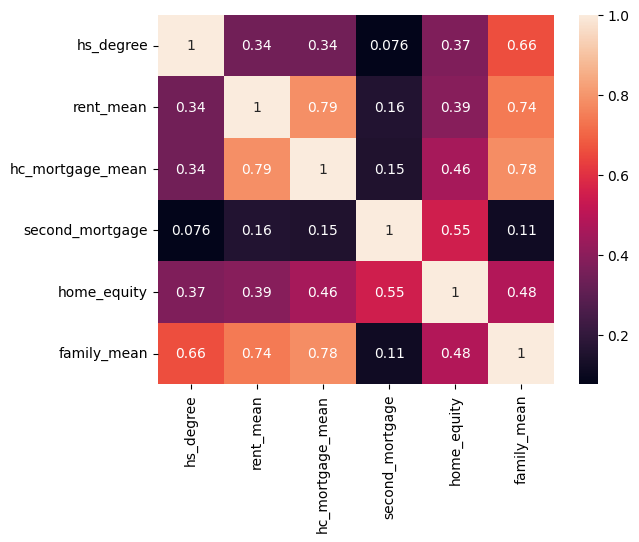

In [10]:
import matplotlib.pyplot as mp
import seaborn as sb
from PIL import _imaging
from PIL import Image

data = df_sampled[['hs_degree', 'rent_mean', 'hc_mortgage_mean', 'second_mortgage', 'home_equity', 'family_mean']]
dataplot=sb.heatmap(data.corr(), annot=True)
mp.show()

# Interactive US Map

In [11]:
import plotly.express as px

avg_grad_rates = df.groupby('state_ab')['hs_degree'].mean().reset_index()
fig = px.choropleth(avg_grad_rates, locations='state_ab', locationmode='USA-states', color='hs_degree', hover_name='state_ab', color_continuous_scale='blues', title='Average High School Graduation Rates by State')
fig.update_layout(geo_scope='usa')
fig.show()

# Scatterplot of Degree Percentage versus Debt Percentage

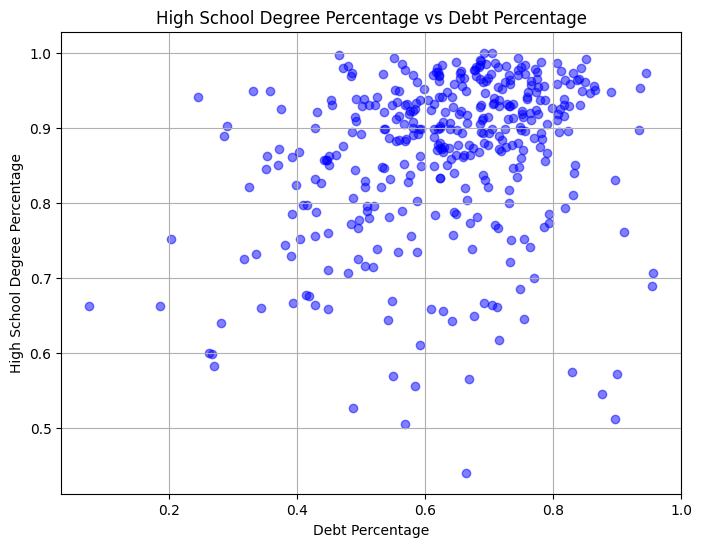

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_sampled['debt'], df_sampled['hs_degree'], color='b', alpha=0.5)
plt.title('High School Degree Percentage vs Debt Percentage')
plt.xlabel('Debt Percentage')
plt.ylabel('High School Degree Percentage')
plt.grid(True)
plt.show()

# Line Chart of Graduation Rate versus Debt Percentage

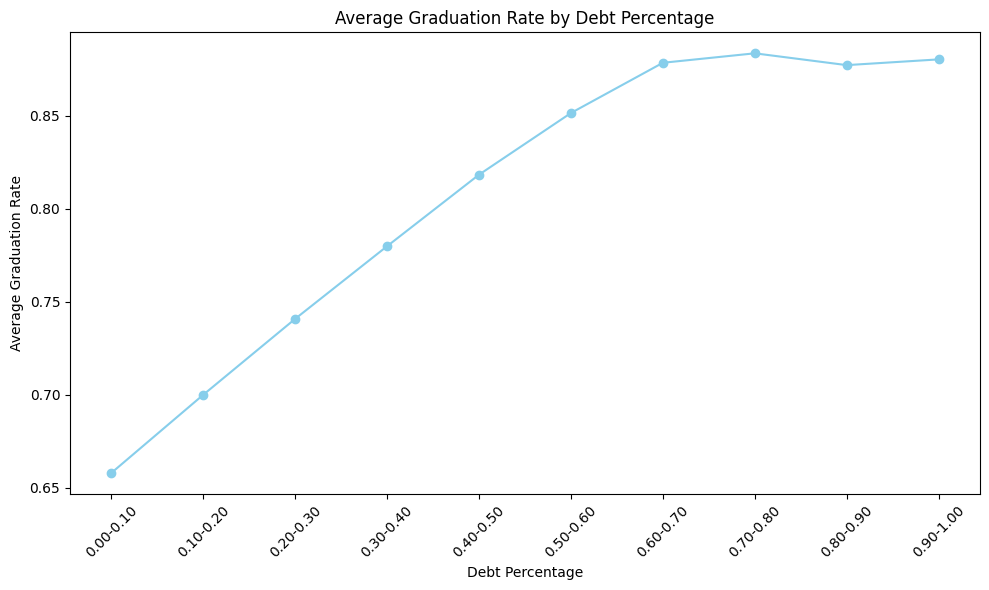

In [13]:
bins = np.linspace(0, 1, 11)
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]
df['debt_binned'] = pd.cut(df['debt'], bins=bins, labels=labels, right=False)
avg_graduation_rate = df.groupby('debt_binned', observed=True)['hs_degree'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_graduation_rate.index, avg_graduation_rate.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Debt Percentage')
plt.ylabel('Average Graduation Rate')
plt.title('Average Graduation Rate by Debt Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# identify the X and y
X = df_sampled[['debt', 'family_mean']]
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creates the random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# makes predictions
y_pred = clf.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.79
Confusion Matrix:
[[18 10]
 [ 6 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.81      0.88      0.84        48

    accuracy                           0.79        76
   macro avg       0.78      0.76      0.77        76
weighted avg       0.79      0.79      0.79        76



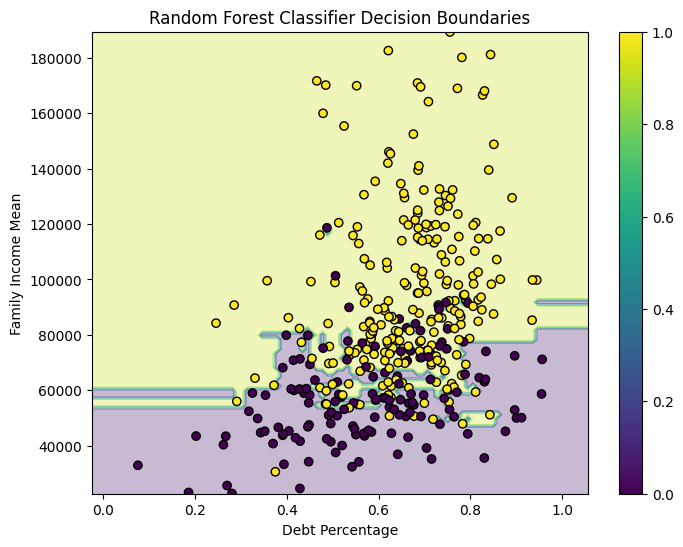

In [15]:
# plots boundaries
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X.values[:, 0].min() - 0.1, X.values[:, 0].max() + 0.1, 100), np.linspace(X.values[:, 1].min() - 100, X.values[:, 1].max() + 100, 100))
grid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
Z = clf.predict(grid_df).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Debt Percentage')
plt.ylabel('Family Income Mean')
plt.title('Random Forest Classifier Decision Boundaries')
plt.colorbar()
plt.show()

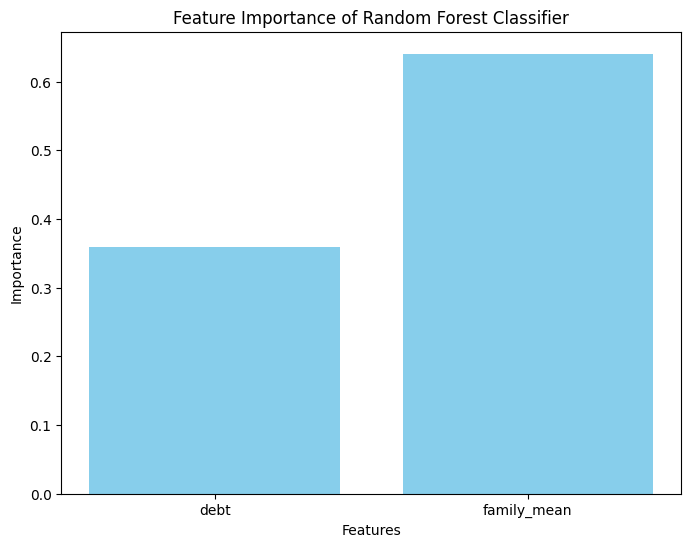

In [16]:
# plots features
plt.figure(figsize=(8, 6))
plt.bar(X.columns, clf.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

# Decision Tree Classifier

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# find X and y
X = df_sampled[['debt', 'family_mean']]
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

# separates data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creates the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# makes predictions
y_pred = clf.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.70
Confusion Matrix:
[[14 14]
 [ 9 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        28
           1       0.74      0.81      0.77        48

    accuracy                           0.70        76
   macro avg       0.67      0.66      0.66        76
weighted avg       0.69      0.70      0.69        76



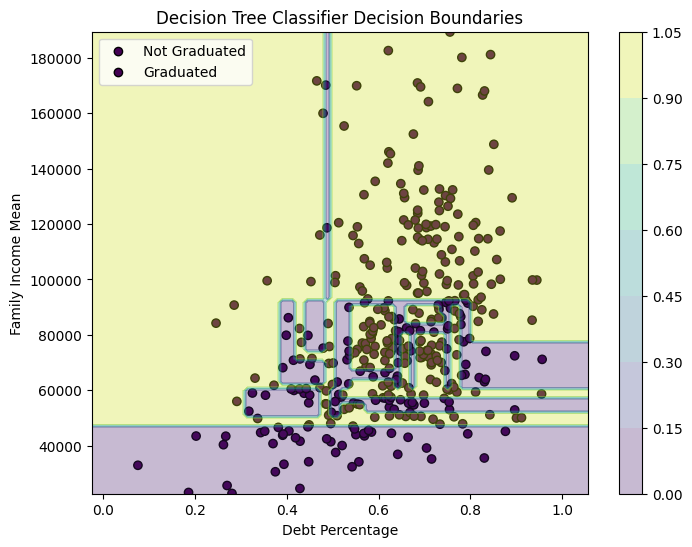

In [18]:
# plots the decision tree
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0]['debt'], X[y == 0]['family_mean'], c=y[y == 0], cmap='viridis', edgecolors='k', label='Not Graduated')
plt.scatter(X[y == 1]['debt'], X[y == 1]['family_mean'], c=y[y == 1], cmap='viridis', edgecolors='k', label='Graduated')
xx, yy = np.meshgrid(np.linspace(X['debt'].min() - 0.1, X['debt'].max() + 0.1, 100),
                     np.linspace(X['family_mean'].min() - 100, X['family_mean'].max() + 100, 100))
Z = clf.predict(grid_df).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.xlabel('Debt Percentage')
plt.ylabel('Family Income Mean')
plt.title('Decision Tree Classifier Decision Boundaries')
plt.colorbar()
plt.legend()
plt.show()

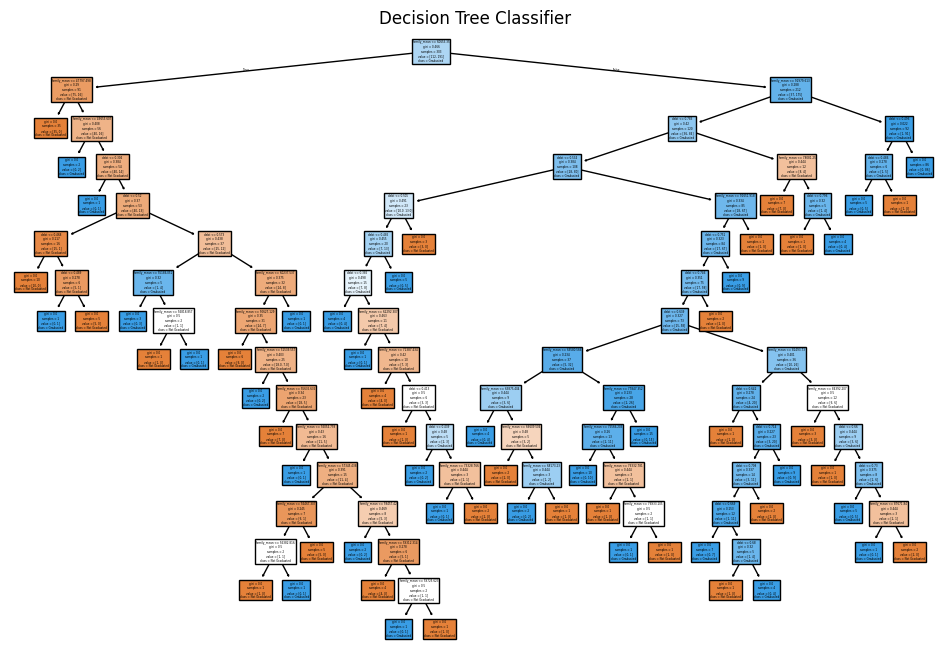

In [19]:
# plots the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Graduated', 'Graduated'])
plt.title('Decision Tree Classifier')
plt.show()

# Pair Plot of Rent Mean versus Graduation Rate

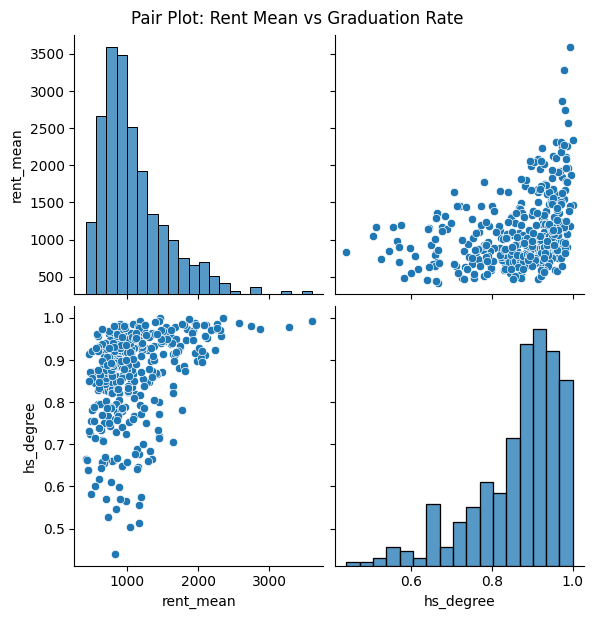

In [20]:
sb.pairplot(df_sampled[['rent_mean', 'hs_degree']], height=3)
plt.suptitle('Pair Plot: Rent Mean vs Graduation Rate', y=1.02)
plt.show()

# Joint Plot of Mortgage Mean versus Graduation Rate

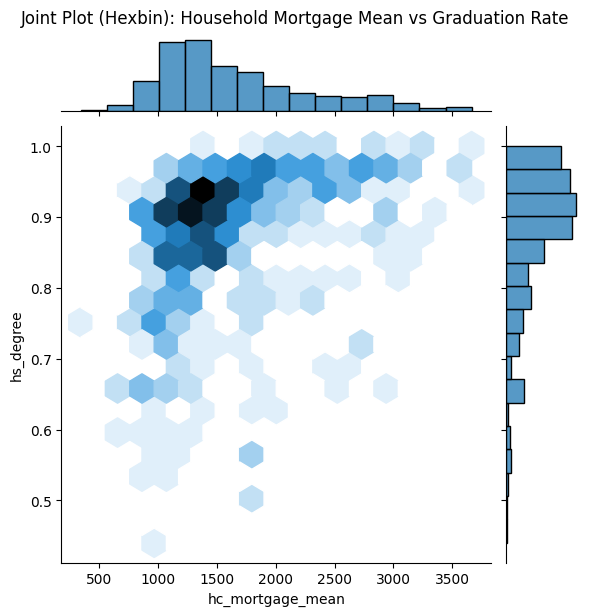

In [21]:
sb.jointplot(x='hc_mortgage_mean', y='hs_degree', data=df_sampled, kind='hex', height=6)
plt.suptitle('Joint Plot (Hexbin): Household Mortgage Mean vs Graduation Rate', y=1.02)
plt.show()

# Scatter Plot of Family Income Mean versus High School Degree Rate

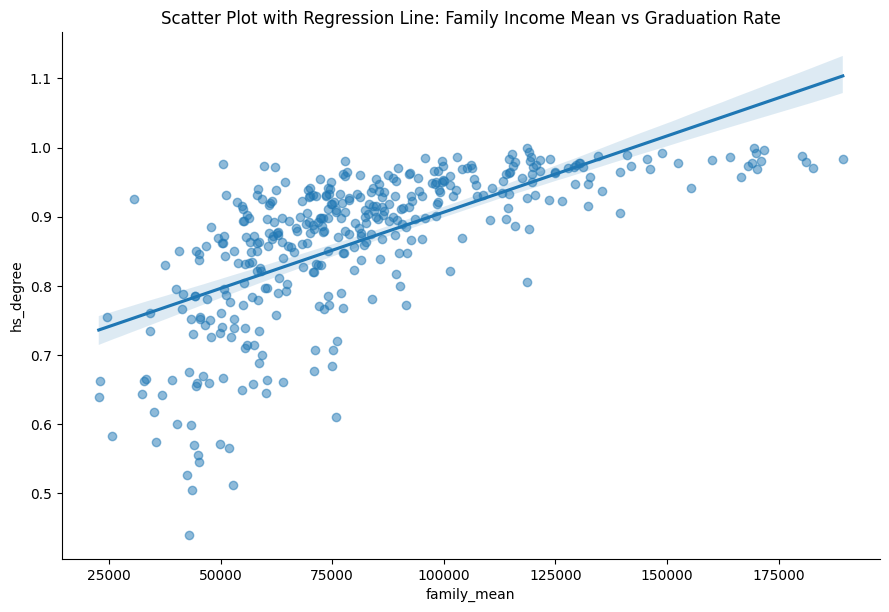

In [22]:
sb.lmplot(x='family_mean', y='hs_degree', data=df_sampled, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Family Income Mean vs Graduation Rate')
plt.show()